# Introduction to ETS Decomposition  
## Error - Trend - Seasonality
_____

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


Parsing the date and setting it as the index

In [5]:
df.dropna(inplace= True)

In [6]:
df['Month'] = pd.to_datetime(df['Month'])

In [11]:
df.set_index(df['Month'], inplace= True)
df.drop('Month', axis = 1, inplace = True)

In [12]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


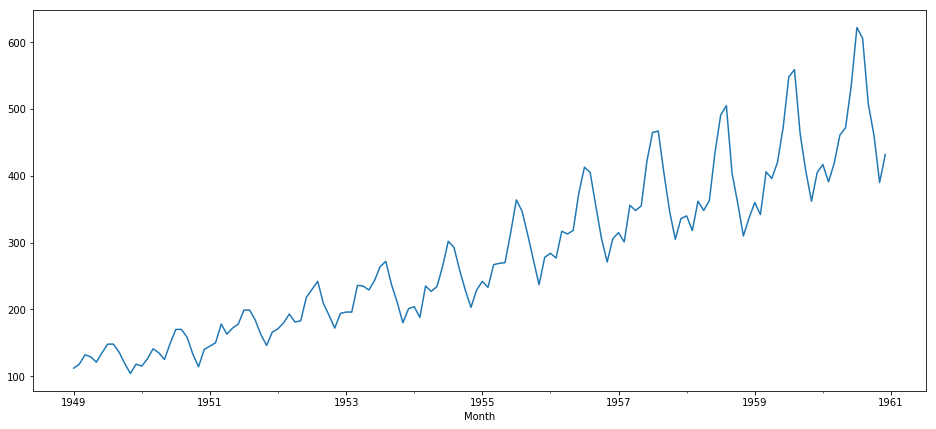

In [15]:
df['Thousands of Passengers'].plot(figsize = (16,7))

## ETS

We can use an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers). A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

According this chart, it looks like the trend in these earlier days is slightly increasing at a higher rate than just linear (although it is a  bit hard to tell from this one plot).

### Time Series Components

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

- Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
- Non-Systematic: Components of the time series that cannot be directly modeled.

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

 - Level: The average value in the series.
 - Trend: The increasing or decreasing value in the series.
 - Seasonality: The repeating short-term cycle in the series.
 - Noise: The random variation in the series.


#### Combining Time Series Components

A series is thought to be an aggregate or combination of these four components.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively.

#### Additive Model

An additive model suggests that the components are added together as follows:
	
$y(t) = Level + Trend + Seasonality + Noise$

An additive model is linear where changes over time are consistently made by the same amount.  
A linear trend is a straight line.  
A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).  
#### Multiplicative Model

A multiplicative model suggests that the components are multiplied together as follows:

$y(t) = Level * Trend * Seasonality * Noise$

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.  
A nonlinear trend is a curved line.  
A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

___
**Decomposition** is a useful abstraction.

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem.

It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

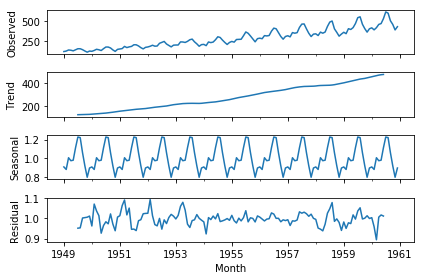

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Thousands of Passengers'], model = 'multiplicative')
result.plot();

The very first rectangle is the same one that we plotted out earlier.

**Automatic Decompose**
The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called *seasonal_decompose()*. It requires that you specify whether the model is additive or multiplicative.

Both will produce a result and you must be careful to be critical when interpreting the result. A review of a plot of the time series and some summary statistics can often be a good start to get an idea of whether your time series problem looks additive or multiplicative.

The seasonal_decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition.

### de nada!